In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
from matplotlib_venn import venn3

In [2]:

# Load data
data_ec_contrib = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/pred_metagenome_contrib.tsv', sep='\t', dtype=str)
data_ec_unstrat = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/pred_metagenome_unstrat.tsv', sep='\t', dtype=str)
data_weighted_nsti = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/weighted_nsti.tsv', sep='\t', dtype=str)
data_asv_abun_norm = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/seqtab_norm.tsv', sep='\t', dtype=str)
data_ko_contrib = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/KO_metagenome_out/pred_metagenome_contrib.tsv', sep='\t', dtype=str)
data_ko_unstrat = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/KO_metagenome_out/pred_metagenome_unstrat.tsv', sep='\t', dtype=str)
data_path_abun_contrib = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/pathways_out/path_abun_contrib.tsv', sep='\t', dtype=str)
data_path_abun_unstrat = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/pathways_out/path_abun_unstrat.tsv', sep='\t', dtype=str)
data_weighted_nsti = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/weighted_nsti.tsv', sep='\t', dtype=str)
data_nsti_map = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/marker_predicted_and_nsti.tsv', sep='\t', dtype=str)

In [3]:
# Filter to three samples (barcode01 = Køng_SBP_silaged, barcode25 = NL_SBP_silaged, barcode49 = Køng_PR1)
samples = ['barcode01', 'barcode25', 'barcode49']
samples_unstrat = ['function', 'barcode01', 'barcode25', 'barcode49']
data_ec_contrib_filtered = data_ec_contrib[data_ec_contrib["sample"].isin(samples)]
data_ec_unstrat_filtered = data_ec_unstrat[samples_unstrat]
data_weighted_nsti_filtered = data_weighted_nsti[data_weighted_nsti["sample"].isin(samples)]
data_asv_abun_norm_filtered = data_asv_abun_norm[samples]
data_ko_contrib_filtered = data_ko_contrib[data_ko_contrib["sample"].isin(samples)]
data_ko_unstrat_filtered = data_ko_unstrat[samples_unstrat]
data_path_abun_contrib_filtered = data_path_abun_contrib[data_path_abun_contrib["sample"].isin(samples)]
data_path_abun_unstrat_filtered = data_path_abun_unstrat[samples]

print(data_ec_contrib_filtered.head(10))

      sample    function             taxon taxon_abun         taxon_rel_abun  \
0  barcode01  EC:1.1.1.1  FLASV100000.1463        6.0   0.012163191102382438   
1  barcode01  EC:1.1.1.1  FLASV100071.1378        7.0   0.014190389619446176   
2  barcode01  EC:1.1.1.1  FLASV100088.1355        9.0   0.018244786653573656   
3  barcode01  EC:1.1.1.1  FLASV100100.1384      886.0      1.796097886118473   
4  barcode01  EC:1.1.1.1  FLASV100102.1357        1.0  0.0020271985170637395   
5  barcode01  EC:1.1.1.1  FLASV100115.1345        2.0   0.004054397034127479   
6  barcode01  EC:1.1.1.1  FLASV100117.1490        1.0  0.0020271985170637395   
7  barcode01  EC:1.1.1.1  FLASV100307.1396      192.0      0.389222115276238   
8  barcode01  EC:1.1.1.1  FLASV100334.1359        1.0  0.0020271985170637395   
9  barcode01  EC:1.1.1.1  FLASV100401.1396        3.0   0.006081595551191219   

  genome_function_count taxon_function_abun taxon_rel_function_abun  \
0                     2                12.0    0

In [4]:
# Save filtered data to new files
data_ec_contrib_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ec_contrib_filtered.tsv', sep='\t', index=False)
data_ec_unstrat_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ec_unstrat_filtered.tsv', sep='\t', index=False)
data_weighted_nsti_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/weighted_nsti_filtered.tsv', sep='\t', index=False)
data_asv_abun_norm_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/asv_abun_norm_filtered.tsv', sep='\t', index=False)
data_ko_contrib_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ko_contrib_filtered.tsv', sep='\t', index=False)
data_ko_unstrat_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ko_unstrat_filtered.tsv', sep='\t', index=False)
data_path_abun_contrib_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/path_abun_contrib_filtered.tsv', sep='\t', index=False)
data_path_abun_unstrat_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/path_abun_unstrat_filtered.tsv', sep='\t', index=False)
data_weighted_nsti_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/weighted_nsti_filtered.tsv', sep='\t', index=False)

/tmp/ipykernel_2821046/3681029468.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = df.groupby("sample", as_index=False).apply(


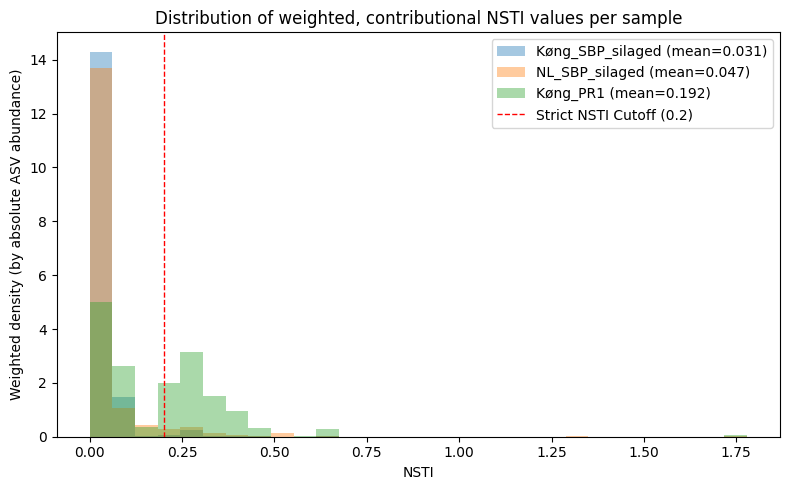

In [5]:
############################
###  NSTI DISTRIBUTION   ###
############################

# Below code uses the ASV-NSTI map (i.e. marker_predicted_and_nsti.tsv) and stratified ASV abundance to obtain contributional NSTI values for each sample

# Selecting the three samples
sample_cols = ['barcode01', 'barcode25', 'barcode49']
sample_name_map = {
    'barcode01': 'Køng_SBP_silaged',
    'barcode25': 'NL_SBP_silaged',
    'barcode49': 'Køng_PR1'
}


# Normalising 
data_nsti_map = data_nsti_map.rename(columns={'sequence': 'taxon'})


# Remove 16S_rRNA_count column
data_nsti_map = data_nsti_map[['taxon', 'metadata_NSTI']].dropna(subset=['taxon'])


# Extract columns from data_ec_contrib_filtered
use_cols = ['sample', 'taxon', 'taxon_abun']
data_ec_contrib_subset = data_ec_contrib_filtered.loc[data_ec_contrib_filtered['sample'].isin(sample_cols), use_cols].copy()


# Ensure numeric abundance
data_ec_contrib_subset["taxon_abun"] = pd.to_numeric(data_ec_contrib_subset["taxon_abun"], errors="coerce").fillna(0)
data_nsti_map["metadata_NSTI"] = pd.to_numeric(data_nsti_map["metadata_NSTI"], errors="coerce").fillna(0)


# Rename NSTI column
data_nsti_map = data_nsti_map.rename(columns={"metadata_NSTI": "nsti"})


# Join NSTI onto contributional data
df  = data_ec_contrib_subset.merge(data_nsti_map, on='taxon', how='left')


# Calculate per-sample contributional NSTI values
# weighted_NSTI(sample) = sum( NSTI_j * taxon_abun_j ) / sum( taxon_abun_j )
grp = df.groupby("sample", as_index=False).apply(
    lambda g: pd.Series({
        "weighted_nsti": (g["nsti"] * g["taxon_abun"]).sum() / max(g["taxon_abun"].sum(), 1e-12),
        "n_asvs": g["taxon"].nunique(),
        "total_abun": g["taxon_abun"].sum(),
    })
).reset_index(drop=True)

grp["sample_label"] = grp["sample"].map(sample_name_map).fillna(grp["sample"])
df["sample_label"] = df["sample"].map(sample_name_map).fillna(df["sample"])

# Visualise distribution of weighted NSTI values per sample
mean_map = dict(zip(grp["sample"], grp["weighted_nsti"]))

plt.figure(figsize=(8,5))
bins = np.linspace(0, max(0.35, df["nsti"].max()), 30)

for s in sample_cols:
    sub = df.loc[df["sample"] == s]
    if sub.empty:
        continue
    mean_val = mean_map.get(s, np.nan)
    plt.hist(
        sub["nsti"],
        bins=bins,
        weights=sub["taxon_abun"],
        alpha=0.4,
        label=f"{sample_name_map.get(s, s)} (mean={mean_val:.3f})" if pd.notna(mean_val) else sample_name_map.get(s, s),
        density=True,
    )  # density for shape comparability


plt.axvline(0.2, color='red', linestyle='--', linewidth=1, label='Strict NSTI Cutoff (0.2)')


plt.xlabel("NSTI")
plt.ylabel("Weighted density (by absolute ASV abundance)")
plt.title("Distribution of weighted, contributional NSTI values per sample")
plt.legend()
plt.tight_layout()
plt.show()



In [6]:
print(data_nsti_map.head(10))

              taxon      nsti
0       FLASV1.1417  0.349506
1      FLASV10.1442  0.049060
2     FLASV100.1441  0.070887
3    FLASV1000.1425  0.025875
4   FLASV10000.1306  0.003744
5  FLASV100000.1463  0.322168
6  FLASV100001.1308  0.053131
7  FLASV100002.1351  0.287722
8  FLASV100003.1324  0.023616
9  FLASV100004.1328  0.282746


In [7]:
############################
###    EC UPSET PLOT     ###
############################

# input
sample_cols = ['barcode01', 'barcode25', 'barcode49']
cols = ["function"] + sample_cols_ec
presence_threshold = 0.0

sample_name_map = {
    'barcode01': 'Køng_SBP_silaged',
    'barcode25': 'NL_SBP_silaged',
    'barcode49': 'Køng_PR1'
}

# Rename the columns
data_ec_unstrat_filtered = data_ec_unstrat_filtered.rename(columns=sample_name_map)

# Update column lists to match the new names
sample_cols_ec = list(sample_name_map.values())
cols = ["function"] + sample_cols_ec

data_ec_unstrat_filtered = data_ec_unstrat_filtered[cols].copy()
for c in sample_cols_ec:
    data_ec_unstrat_filtered[c] = pd.to_numeric(data_ec_unstrat_filtered[c], errors="coerce").fillna(0.0)

# Presence/absence matrix
bin_data_ec_unstrat_filtered = data_ec_unstrat_filtered.copy()
for c in sample_cols_ec:
    bin_data_ec_unstrat_filtered[c] = (bin_data_ec_unstrat_filtered[c] > presence_threshold).astype(int)

# Dictionary of sets
sets = {s: set(bin_data_ec_unstrat_filtered.loc[bin_data_ec_unstrat_filtered[s] == 1, "function"]) for s in sample_cols_ec}

# UpSet plot
ind = (bin_data_ec_unstrat_filtered.set_index("function")[sample_cols_ec] == 1)
data = from_indicators(ind.columns, ind)

plt.figure(figsize=(8,5))
UpSet(data, show_counts=True, sort_by="cardinality").plot()
plt.suptitle("UpSet plot of EC intersections (presence/absence): Køng_SBP_silaged, NL_SBP_silaged, Køng_PR1")
plt.tight_layout()
plt.show()

NameError: name 'sample_cols_ec' is not defined

/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

<Figure size 800x500 with 0 Axes>

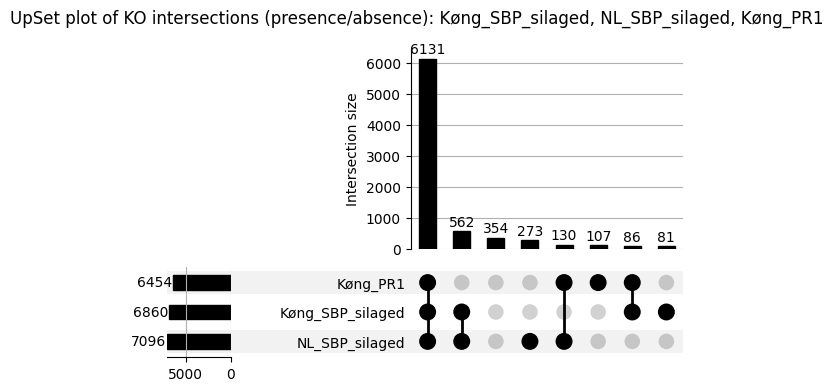

In [ ]:
############################
###    KO UPSET PLOT     ###
############################

# input
sample_cols_ko = ['barcode01', 'barcode25', 'barcode49']
cols = ["function"] + sample_cols_ko
presence_threshold = 0.0

sample_name_map = {
    'barcode01': 'Køng_SBP_silaged',
    'barcode25': 'NL_SBP_silaged',
    'barcode49': 'Køng_PR1'
}

# Rename the columns
data_ko_unstrat_filtered = data_ko_unstrat_filtered.rename(columns=sample_name_map)

# Update column lists to match the new names
sample_cols_ko = list(sample_name_map.values())
cols = ["function"] + sample_cols_ko

data_ko_unstrat_filtered = data_ko_unstrat_filtered[cols].copy()
for c in sample_cols_ko:
    data_ko_unstrat_filtered[c] = pd.to_numeric(data_ko_unstrat_filtered[c], errors="coerce").fillna(0.0)

# Presence/absence matrix
bin_data_ko_unstrat_filtered = data_ko_unstrat_filtered.copy()
for c in sample_cols_ko:
    bin_data_ko_unstrat_filtered[c] = (bin_data_ko_unstrat_filtered[c] > presence_threshold).astype(int)

# Dictionary of sets
sets = {s: set(bin_data_ko_unstrat_filtered.loc[bin_data_ko_unstrat_filtered[s] == 1, "function"]) for s in sample_cols_ko}

# UpSet plot
ind = (bin_data_ko_unstrat_filtered.set_index("function")[sample_cols_ko] == 1)
data = from_indicators(ind.columns, ind)

plt.figure(figsize=(8,5))
UpSet(data, show_counts=True, sort_by="cardinality").plot()
plt.suptitle("UpSet plot of KO intersections (presence/absence): Køng_SBP_silaged, NL_SBP_silaged, Køng_PR1")
plt.tight_layout()
plt.show()

/tmp/ipykernel_3339770/803531303.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_path_abun_contrib_filtered["norm_taxon_function_contrib"] = pd.to_numeric(


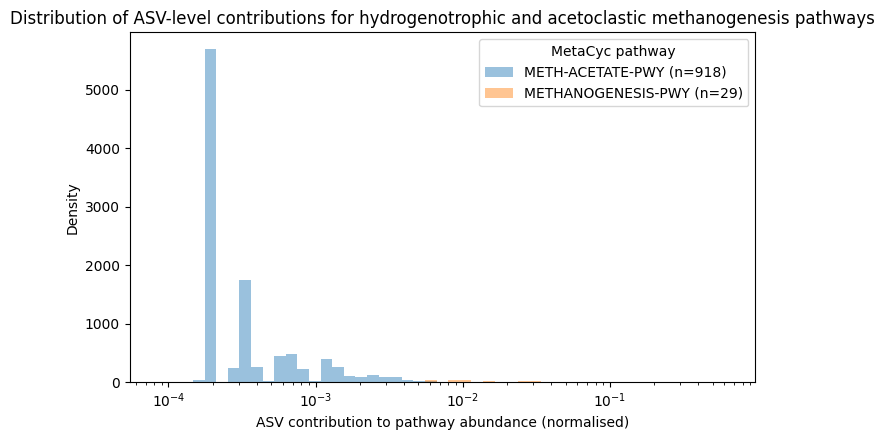

      sample    function             taxon taxon_abun         taxon_rel_abun  \
0  barcode01  1CMET2-PWY  FLASV100071.1378        7.0   0.014190389619446188   
1  barcode01  1CMET2-PWY  FLASV100485.1367        1.0  0.0020271985170637412   
2  barcode01  1CMET2-PWY  FLASV100491.1367       0.75  0.0015203988877978056   
3  barcode01  1CMET2-PWY  FLASV100665.1364        1.0  0.0020271985170637412   
4  barcode01  1CMET2-PWY  FLASV100718.1376        1.0  0.0020271985170637412   
5  barcode01  1CMET2-PWY  FLASV100751.1353        1.0  0.0020271985170637412   
6  barcode01  1CMET2-PWY  FLASV100878.1362        0.5  0.0010135992585318706   
7  barcode01  1CMET2-PWY  FLASV100904.1346        1.0  0.0020271985170637412   
8  barcode01  1CMET2-PWY  FLASV100978.1344        1.0  0.0020271985170637412   
9  barcode01  1CMET2-PWY     FLASV101.1438        1.0  0.0020271985170637412   

  genome_function_count taxon_function_abun taxon_rel_function_abun  \
0                   1.0                 7.0    0

In [ ]:
############################
### PATHWAY CONTRIBUTORS ###
############################


# Pathways of interest
pathways = ['METH-ACETATE-PWY', # Acetoclastic methanogenesis
            'METHANOGENESIS-PWY'] # Hydrogenotrophic methanogenesis


# Ensure numeric values
data_path_abun_contrib_filtered["norm_taxon_function_contrib"] = pd.to_numeric(
    data_path_abun_contrib_filtered["norm_taxon_function_contrib"]
        .astype(str)
        .str.strip()
        .str.replace(",", ".", regex=False)
        .str.replace(r"[^\d\.\-eE+]", "", regex=True),
    errors="coerce"
)


# Log scale friendly data
df = data_path_abun_contrib_filtered[data_path_abun_contrib_filtered['norm_taxon_function_contrib'] > 0]


# Subsetting 
sub = df[df["function"].isin(pathways)].copy()


## Histogram ##
plt.figure(figsize=(7.2, 4.5))


# Common log-spaced bins across [1e-4, 1]
xmin = max(1e-6, sub['norm_taxon_function_contrib'].min() * 0.5)
xmin = 1e-6 if np.isinf(xmin) or np.isnan(xmin) else xmin
xmin = max(xmin, 1e-6)
xmax = min(1.0, max(1e-6, sub['norm_taxon_function_contrib'].max() * 1.1))
bins = np.logspace(np.log10(xmin), np.log10(xmax if xmax > xmin else xmin*10), 50)

for pw in pathways:
    s = sub.loc[sub["function"] == pw, 'norm_taxon_function_contrib']
    if s.empty:
        continue
    plt.hist(
        s.values,
        bins=bins,
        density=True,
        alpha=0.45,
        label=f"{pw} (n={len(s)})",
        edgecolor="none",
    )


plt.xscale("log")
plt.xlabel("ASV contribution to pathway abundance (normalised)")
plt.ylabel("ASV amount")
plt.title("Distribution of ASV-level contributions for hydrogenotrophic and acetoclastic methanogenesis pathways")
plt.legend(title="MetaCyc pathway")
plt.tight_layout()
plt.show()


print(df.head(10))

In [14]:

print(sub.head(10))

Empty DataFrame
Columns: [sample, function, taxon, taxon_abun, taxon_rel_abun, genome_function_count, taxon_function_abun, taxon_rel_function_abun, norm_taxon_function_contrib]
Index: []
